In [1]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
dataset = pd.read_csv('CSV\Data Prototype 3a.csv')
dataset.head()

,Tanggal,Tn,Tx,Tavg,RH_avg,ff_x,ddd_x,ff_avg,ddd_car,bulan,RH_avg_5day,RH1,RH2,RH3,ff_x1,ff_x2,ff_x3,RR_avg5_day,RR1,RR2,RR3,RR
0,06-02-2010,24.7,29.4,26.5,85.0,7.0,240.0,2.0,7,2,80.4,81.0,80.0,80.0,7.0,9.0,9.0,3.560000,2.5,0.80000,1.70000,0.20000
1,07-02-2010,25.0,32.2,27.5,83.0,7.0,120.0,2.0,5,2,81.0,80.0,80.0,85.0,9.0,9.0,7.0,3.480000,0.8,1.70000,0.20000,16.10000
2,08-02-2010,25.2,32.5,27.4,81.0,10.0,100.0,2.0,8,2,81.8,80.0,85.0,83.0,9.0,7.0,7.0,4.260000,1.7,0.20000,16.10000,8.33913
3,09-02-2010,25.0,32.0,27.2,82.0,6.0,100.0,2.0,3,2,81.8,85.0,83.0,81.0,7.0,7.0,10.0,5.427826,0.2,16.10000,8.33913,0.00000
4,10-02-2010,24.2,32.2,28.1,82.0,7.0,200.0,2.0,5,2,82.2,83.0,81.0,82.0,7.0,10.0,6.0,5.267826,16.1,8.33913,0.00000,7.70000


In [3]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Tn,2987.0,24.505217,0.986270,18.0,24.000000,24.600000,25.188385,27.900000
Tx,2981.0,30.964174,1.608543,3.6,30.000000,31.200000,32.100000,36.000000
Tavg,2989.0,27.265009,1.128515,23.2,26.600000,27.400000,28.000000,30.700000
RH_avg,2988.0,82.781296,4.080208,41.0,80.000000,83.000000,85.000000,97.000000
ff_x,2988.0,6.100179,2.474871,0.0,4.000000,6.000000,8.000000,36.000000
ddd_x,2988.0,165.489971,66.810621,0.0,120.000000,140.000000,220.000000,360.000000
ff_avg,2989.0,2.180653,1.092883,0.0,1.000000,2.000000,3.000000,7.000000
ddd_car,2989.0,3.742723,2.318741,1.0,1.000000,4.000000,5.000000,9.000000
bulan,2989.0,6.324189,3.464433,1.0,3.000000,6.000000,9.000000,12.000000
RH_avg_5day,2989.0,82.777564,2.874954,68.6,81.000000,82.800000,84.600000,90.400000


In [4]:
dataset.shape

(2989, 22)

In [5]:
def color_negative_red(val):
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

In [6]:
dataset.corr().style.applymap(color_negative_red)

,Tn,Tx,Tavg,RH_avg,ff_x,ddd_x,ff_avg,ddd_car,bulan,RH_avg_5day,RH1,RH2,RH3,ff_x1,ff_x2,ff_x3,RR_avg5_day,RR1,RR2,RR3,RR
Tn,1,0.443456,0.661905,-0.0175035,-0.196815,0.154509,-0.242621,0.0312697,-0.136823,0.0129062,0.0177278,0.0278872,-0.036786,-0.250749,-0.225449,-0.224623,0.145503,0.088078,0.0966227,0.0297492,-0.0388765
Tx,0.443456,1,0.715719,-0.221314,-0.172169,0.365357,-0.4006,0.126539,-0.393597,-0.102348,-0.0567726,-0.0931363,-0.118143,-0.200803,-0.18234,-0.18732,0.191972,0.113215,0.0834721,0.100405,0.0519979
Tavg,0.661905,0.715719,1,-0.389525,-0.233278,0.214406,-0.316205,0.0371484,-0.271273,-0.117866,-0.0710004,-0.0890887,-0.145108,-0.280954,-0.270412,-0.256587,0.193055,0.109468,0.103602,0.0964614,-0.00705979
RH_avg,-0.0175035,-0.221314,-0.389525,1,-0.104114,-0.0442258,-0.161846,-0.0953957,0.112233,0.436876,0.281951,0.345924,0.467797,-0.0512563,-0.0677436,-0.104481,0.184199,0.10857,0.132065,0.131299,0.279939
ff_x,-0.196815,-0.172169,-0.233278,-0.104114,1,-0.00853959,0.487974,0.209458,0.0533304,-0.0907338,-0.077371,-0.0621868,-0.0792394,0.50862,0.521958,0.564056,-0.182817,-0.101605,-0.104751,-0.119572,-0.117896
ddd_x,0.154509,0.365357,0.214406,-0.0442258,-0.00853959,1,-0.307438,0.225408,-0.287445,-0.0959331,-0.0743541,-0.0659829,-0.0678037,-0.0225511,-0.0423971,-0.0370004,0.116274,0.0626356,0.0581581,0.070849,0.0718255
ff_avg,-0.242621,-0.4006,-0.316205,-0.161846,0.487974,-0.307438,1,0.0417278,0.213692,-0.0754898,-0.0665584,-0.0504673,-0.0735353,0.286754,0.301725,0.346075,-0.296836,-0.16826,-0.172793,-0.17746,-0.172443
ddd_car,0.0312697,0.126539,0.0371484,-0.0953957,0.209458,0.225408,0.0417278,1,-0.163259,-0.0881854,-0.0707788,-0.0846641,-0.0621032,0.15653,0.158739,0.159878,-0.0325959,-0.00245413,-0.0392641,-0.0283399,-0.00727341
bulan,-0.136823,-0.393597,-0.271273,0.112233,0.0533304,-0.287445,0.213692,-0.163259,1,0.180688,0.128177,0.123922,0.120172,0.0451065,0.0461118,0.0479389,0.0532057,0.0299871,0.0312157,0.035493,0.0340157
RH_avg_5day,0.0129062,-0.102348,-0.117866,0.436876,-0.0907338,-0.0959331,-0.0754898,-0.0881854,0.180688,1,0.746511,0.728464,0.659158,-0.11898,-0.121516,-0.106524,0.393486,0.235173,0.223938,0.205098,0.142305


In [7]:
dataset.fillna(method='ffill',inplace=True)

In [8]:
dataset = dataset.drop(columns = ['ff_avg','Tanggal'])

In [9]:
dataset[dataset.Tx<=20]

,Tn,Tx,Tavg,RH_avg,ff_x,ddd_x,ddd_car,bulan,RH_avg_5day,RH1,RH2,RH3,ff_x1,ff_x2,ff_x3,RR_avg5_day,RR1,RR2,RR3,RR
2427,25.3,3.6,27.6,79.0,7.0,130.0,3,5,80.8,75.0,84.0,83.0,8.0,4.0,5.0,3.916471,8.541176,0.4,0.0,19.4


In [10]:
dataset = dataset.drop(dataset.index[2427])

In [11]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(dataset)

In [12]:
dataset_scaled

array([[0.67676768, 0.44067797, 0.44      , ..., 0.00401003, 0.0085213 ,
        0.00100251],
       [0.70707071, 0.6779661 , 0.57333333, ..., 0.0085213 , 0.00100251,
        0.08070175],
       [0.72727273, 0.70338983, 0.56      , ..., 0.00100251, 0.08070175,
        0.04180015],
       ...,
       [0.70707071, 0.52542373, 0.6       , ..., 0.00250627, 0.05635517,
        0.00200501],
       [0.72783389, 0.59500446, 0.62814815, ..., 0.05635517, 0.00200501,
        0.05635517],
       [0.72783389, 0.62711864, 0.58666667, ..., 0.00200501, 0.05635517,
        0.05635517]])

In [13]:
dataset.columns

Index(['Tn', 'Tx', 'Tavg', 'RH_avg', 'ff_x', 'ddd_x', 'ddd_car', 'bulan',
       'RH_avg_5day', 'RH1', 'RH2', 'RH3', 'ff_x1', 'ff_x2', 'ff_x3',
       'RR_avg5_day', 'RR1', 'RR2', 'RR3', 'RR'],
      dtype='object')

In [14]:
dataset_scaled[:,19]

array([0.00100251, 0.08070175, 0.04180015, ..., 0.00200501, 0.05635517,
       0.05635517])

In [15]:
#Buat split data
#Buat X yg di drop yang target, y jadi target

X = np.delete(dataset_scaled,19,axis=1)
y = dataset_scaled[:,19]

In [16]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10)

In [17]:
X_train.shape[1]

19

In [18]:
X_test2 = X_test

In [19]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)

In [20]:
# Impor Keras dan library yang lain


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [21]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (1,19)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['acc'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [22]:
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 50)             14000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 50)             20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 50)             20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
__________

In [23]:
# Reshaping
X_train = np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1])) 

In [24]:
X_train.shape

(2689, 1, 19)

In [25]:
def on_train_begin(self, logs=None):
    self.epoch = []
    self.history = {}
 
def on_epoch_end(self, epoch, logs=None):
    logs = logs or {}
    self.epoch.append(epoch)
    for k, v in logs.items():
        self.history.setdefault(k, []).append(v)

PERCOBAAN 1

In [26]:
pelatihan = regressor.fit(X_train, y_train, validation_split = 0.10, epochs = 200, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Train on 2420 samples, validate on 269 samples
Epoch 1/200
2420/2420 [==============================] - 8s 3ms/step - loss: 0.0107 - acc: 0.2364 - val_loss: 0.0092 - val_acc: 0.2491
Epoch 2/200
2420/2420 [==============================] - 2s 669us/step - loss: 0.0102 - acc: 0.2364 - val_loss: 0.0091 - val_acc: 0.2491
Epoch 3/200
2420/2420 [==============================] - 2s 670us/step - loss: 0.0100 - acc: 0.2364 - val_loss: 0.0083 - val_acc: 0.2491
Epoch 4/200
2420/2420 [==============================] - 2s 657us/step - loss: 0.0096 - acc: 0.2364 - val_loss: 0.0082 - val_acc: 0.2491
Epoch 5/200
2420/2420 [==============================] - 2s 652us/step - loss: 0.0096 - acc: 0.2364 - val_loss: 0.0081 - val_acc: 0.2491
Epoch 6/200
2420/2420 [==============================] - 2s 650us/step - loss: 0.0096 - acc: 0.2364 - val_loss: 0.0081 - val_acc: 0.2491
Epoch 7/200
2420/2420 [==============================] - 2s 646us/step - loss: 0.0095

2420/2420 [==============================] - 2s 649us/step - loss: 0.0079 - acc: 0.2364 - val_loss: 0.0078 - val_acc: 0.2491
Epoch 59/200
2420/2420 [==============================] - 2s 655us/step - loss: 0.0078 - acc: 0.2364 - val_loss: 0.0082 - val_acc: 0.2491
Epoch 60/200
2420/2420 [==============================] - 2s 651us/step - loss: 0.0079 - acc: 0.2364 - val_loss: 0.0080 - val_acc: 0.2491
Epoch 61/200
2420/2420 [==============================] - 2s 653us/step - loss: 0.0078 - acc: 0.2364 - val_loss: 0.0078 - val_acc: 0.2491
Epoch 62/200
2420/2420 [==============================] - 2s 657us/step - loss: 0.0078 - acc: 0.2364 - val_loss: 0.0079 - val_acc: 0.2491
Epoch 63/200
2420/2420 [==============================] - 2s 654us/step - loss: 0.0079 - acc: 0.2364 - val_loss: 0.0078 - val_acc: 0.2491
Epoch 64/200
2420/2420 [==============================] - 2s 651us/step - loss: 0.0081 - acc: 0.2364 - val_loss: 0.0079 - val_acc: 0.2491
Epoch 65/200
2420/2420 [=======================

2420/2420 [==============================] - 2s 653us/step - loss: 0.0073 - acc: 0.2364 - val_loss: 0.0078 - val_acc: 0.2491
Epoch 118/200
2420/2420 [==============================] - 2s 654us/step - loss: 0.0074 - acc: 0.2364 - val_loss: 0.0082 - val_acc: 0.2491
Epoch 119/200
2420/2420 [==============================] - 2s 662us/step - loss: 0.0072 - acc: 0.2364 - val_loss: 0.0089 - val_acc: 0.2491
Epoch 120/200
2420/2420 [==============================] - 2s 657us/step - loss: 0.0078 - acc: 0.2364 - val_loss: 0.0080 - val_acc: 0.2491
Epoch 121/200
2420/2420 [==============================] - 2s 662us/step - loss: 0.0075 - acc: 0.2368 - val_loss: 0.0079 - val_acc: 0.2491
Epoch 122/200
2420/2420 [==============================] - 2s 653us/step - loss: 0.0075 - acc: 0.2364 - val_loss: 0.0080 - val_acc: 0.2491
Epoch 123/200
2420/2420 [==============================] - 2s 671us/step - loss: 0.0073 - acc: 0.2368 - val_loss: 0.0079 - val_acc: 0.2491
Epoch 124/200
2420/2420 [================

2420/2420 [==============================] - 2s 653us/step - loss: 0.0073 - acc: 0.2364 - val_loss: 0.0088 - val_acc: 0.2491
Epoch 177/200
2420/2420 [==============================] - 2s 668us/step - loss: 0.0070 - acc: 0.2368 - val_loss: 0.0080 - val_acc: 0.2491
Epoch 178/200
2420/2420 [==============================] - 2s 650us/step - loss: 0.0074 - acc: 0.2364 - val_loss: 0.0082 - val_acc: 0.2491
Epoch 179/200
2420/2420 [==============================] - 2s 647us/step - loss: 0.0074 - acc: 0.2368 - val_loss: 0.0080 - val_acc: 0.2491
Epoch 180/200
2420/2420 [==============================] - 2s 648us/step - loss: 0.0071 - acc: 0.2368 - val_loss: 0.0080 - val_acc: 0.2491
Epoch 181/200
2420/2420 [==============================] - 2s 655us/step - loss: 0.0073 - acc: 0.2364 - val_loss: 0.0081 - val_acc: 0.2491
Epoch 182/200
2420/2420 [==============================] - 2s 650us/step - loss: 0.0075 - acc: 0.2364 - val_loss: 0.0087 - val_acc: 0.2491
Epoch 183/200
2420/2420 [================

In [27]:
pelatihan.history

{'val_loss': [0.009188118266101,
  0.009099974490868336,
  0.008275271829591587,
  0.008203288900309335,
  0.00813950722185431,
  0.008107749317672283,
  0.008111420819764355,
  0.007992488044733008,
  0.008043513884317809,
  0.007969004436150248,
  0.007860353053807105,
  0.007847106349083238,
  0.007731547115239069,
  0.008483578942605333,
  0.007908112603173935,
  0.009225209631358158,
  0.008570337361659592,
  0.007680160033284621,
  0.007559972108933784,
  0.007566709204691161,
  0.00808758748916833,
  0.007603817785567289,
  0.007579452485420835,
  0.007886637655713468,
  0.007526336479274258,
  0.00769403050601704,
  0.007562171987199041,
  0.007586588748976533,
  0.007644372800932886,
  0.007991092345334561,
  0.007598458704465938,
  0.007882396822109764,
  0.007649296356302766,
  0.007737348344329343,
  0.007679617243600822,
  0.00769043656336109,
  0.008027780099103718,
  0.007956930562562992,
  0.007708218327782301,
  0.007847038174712802,
  0.007917526074196992,
  0.0082418

In [28]:
def plot_history(pelatihan):
    history_dict = pelatihan.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']
    epochs = range(1, len(acc_values) + 1)
    
    plt.plot(epochs, loss_values, 'b', label='Training loss')
    plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    plt.plot(epochs, acc_values, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc_values, 'r', label='Validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Validation')
    plt.legend()
    plt.show()

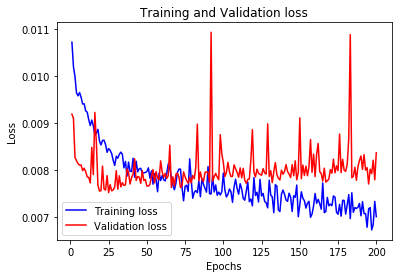

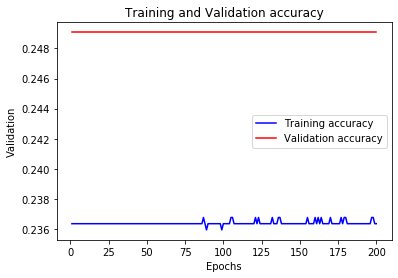

In [29]:
plot_history(pelatihan)

In [30]:
pelatihan.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [31]:
import statistics as stats

In [32]:
loss_mean1 = stats.mean(pelatihan.history['loss'])
loss_mean1

0.0077681206699599286

In [33]:
acc_mean1 = stats.mean(pelatihan.history['acc'])
acc_mean1

0.2363966942381514

In [34]:
valloss_mean1 = stats.mean(pelatihan.history['val_loss'])
valloss_mean1

0.008012312047181783

In [35]:
val_acc_mean1 = stats.mean(pelatihan.history['val_acc'])
val_acc_mean1

0.24907063252420675

In [36]:
X_test.shape

(299, 19)

In [37]:
X_testReal = X_test

In [38]:
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))

In [39]:
predicted_RR = regressor.predict(X_test)

In [40]:
predicted_RR.shape

(299, 1)

In [41]:
predicted_RReal = np.hstack((X_testReal,predicted_RR))

In [42]:
predicted_RReal.shape

(299, 20)

In [43]:
predicted_RReal_a = sc.inverse_transform(predicted_RReal)

In [44]:
percobaan1 = predicted_RReal_a[:,19]

In [45]:
y_testReal = np.asarray(y_test)

In [46]:
y_testReal.shape[0]

299

In [47]:
y_testReal = np.reshape(y_testReal,(y_testReal.shape[0],1))

In [48]:
real_data = np.hstack((X_testReal,y_testReal))

In [49]:
real_data = sc.inverse_transform(real_data)

In [50]:
real_data.shape

(299, 20)

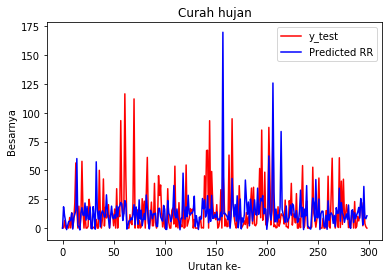

In [51]:
# Visualising the results
plt.plot(real_data[:,19], color = 'red', label = 'y_test')
plt.plot(percobaan1, color = 'blue', label = 'Predicted RR')
plt.title('Curah hujan')
plt.xlabel('Urutan ke-')
plt.ylabel('Besarnya')
plt.legend()
plt.show()

In [52]:
evals = regressor.evaluate(X_test,y_test) #MSE
evals

299/299 [==============================] - 0s 261us/step


[0.010207781323269135, 0.21404682284214824]

In [53]:
evals

[0.010207781323269135, 0.21404682284214824]

In [54]:
from sklearn.metrics import mean_squared_error

In [55]:
mse1 = mean_squared_error(real_data[:,19],percobaan1)
mse1

406.27224106808234

PERCOBAAN 2

In [56]:
pelatihan2 = regressor.fit(X_train, y_train, validation_split = 0.10, epochs = 200, batch_size = 32)

Train on 2420 samples, validate on 269 samples
Epoch 1/200
2420/2420 [==============================] - 2s 689us/step - loss: 0.0076 - acc: 0.2364 - val_loss: 0.0081 - val_acc: 0.2491
Epoch 2/200
2420/2420 [==============================] - 2s 669us/step - loss: 0.0070 - acc: 0.2368 - val_loss: 0.0080 - val_acc: 0.2491
Epoch 3/200
2420/2420 [==============================] - 2s 676us/step - loss: 0.0068 - acc: 0.2368 - val_loss: 0.0077 - val_acc: 0.2491
Epoch 4/200
2420/2420 [==============================] - 2s 673us/step - loss: 0.0070 - acc: 0.2368 - val_loss: 0.0080 - val_acc: 0.2491
Epoch 5/200
2420/2420 [==============================] - 2s 661us/step - loss: 0.0069 - acc: 0.2368 - val_loss: 0.0077 - val_acc: 0.2491
Epoch 6/200
2420/2420 [==============================] - 2s 673us/step - loss: 0.0073 - acc: 0.2364 - val_loss: 0.0080 - val_acc: 0.2491
Epoch 7/200
2420/2420 [==============================] - 2s 649us/step - loss: 0.0068 - acc: 0.2364 - val_loss: 0.0082 - val_acc: 0

2420/2420 [==============================] - 2s 812us/step - loss: 0.0070 - acc: 0.2368 - val_loss: 0.0081 - val_acc: 0.2491
Epoch 60/200
2420/2420 [==============================] - 2s 729us/step - loss: 0.0069 - acc: 0.2368 - val_loss: 0.0080 - val_acc: 0.2491
Epoch 61/200
2420/2420 [==============================] - 2s 681us/step - loss: 0.0068 - acc: 0.2368 - val_loss: 0.0077 - val_acc: 0.2491
Epoch 62/200
2420/2420 [==============================] - 2s 668us/step - loss: 0.0067 - acc: 0.2368 - val_loss: 0.0078 - val_acc: 0.2491
Epoch 63/200
2420/2420 [==============================] - 2s 675us/step - loss: 0.0068 - acc: 0.2368 - val_loss: 0.0078 - val_acc: 0.2491
Epoch 64/200
2420/2420 [==============================] - 2s 694us/step - loss: 0.0068 - acc: 0.2364 - val_loss: 0.0083 - val_acc: 0.2491
Epoch 65/200
2420/2420 [==============================] - 2s 680us/step - loss: 0.0067 - acc: 0.2368 - val_loss: 0.0078 - val_acc: 0.2491
Epoch 66/200
2420/2420 [=======================

2420/2420 [==============================] - 2s 671us/step - loss: 0.0069 - acc: 0.2368 - val_loss: 0.0077 - val_acc: 0.2491
Epoch 119/200
2420/2420 [==============================] - 2s 666us/step - loss: 0.0067 - acc: 0.2368 - val_loss: 0.0078 - val_acc: 0.2491
Epoch 120/200
2420/2420 [==============================] - 2s 685us/step - loss: 0.0067 - acc: 0.2368 - val_loss: 0.0077 - val_acc: 0.2491
Epoch 121/200
2420/2420 [==============================] - 2s 649us/step - loss: 0.0066 - acc: 0.2368 - val_loss: 0.0079 - val_acc: 0.2491
Epoch 122/200
2420/2420 [==============================] - 2s 668us/step - loss: 0.0065 - acc: 0.2368 - val_loss: 0.0078 - val_acc: 0.2491
Epoch 123/200
2420/2420 [==============================] - 2s 669us/step - loss: 0.0067 - acc: 0.2364 - val_loss: 0.0080 - val_acc: 0.2491
Epoch 124/200
2420/2420 [==============================] - 2s 681us/step - loss: 0.0067 - acc: 0.2368 - val_loss: 0.0077 - val_acc: 0.2491
Epoch 125/200
2420/2420 [================

2420/2420 [==============================] - 2s 656us/step - loss: 0.0064 - acc: 0.2368 - val_loss: 0.0087 - val_acc: 0.2491
Epoch 177/200
2420/2420 [==============================] - 2s 645us/step - loss: 0.0066 - acc: 0.2368 - val_loss: 0.0078 - val_acc: 0.2491
Epoch 178/200
2420/2420 [==============================] - 2s 651us/step - loss: 0.0064 - acc: 0.2368 - val_loss: 0.0076 - val_acc: 0.2491
Epoch 179/200
2420/2420 [==============================] - 2s 655us/step - loss: 0.0069 - acc: 0.2368 - val_loss: 0.0081 - val_acc: 0.2491
Epoch 180/200
2420/2420 [==============================] - 2s 652us/step - loss: 0.0065 - acc: 0.2368 - val_loss: 0.0076 - val_acc: 0.2491
Epoch 181/200
2420/2420 [==============================] - 2s 656us/step - loss: 0.0065 - acc: 0.2368 - val_loss: 0.0076 - val_acc: 0.2491
Epoch 182/200
2420/2420 [==============================] - 2s 651us/step - loss: 0.0063 - acc: 0.2368 - val_loss: 0.0077 - val_acc: 0.2491
Epoch 183/200
2420/2420 [================

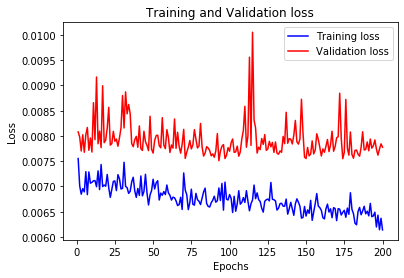

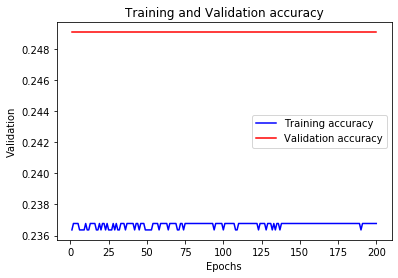

In [57]:
plot_history(pelatihan2)

In [58]:
loss_mean2 = stats.mean(pelatihan2.history['loss'])
loss_mean2

0.006745273333090003

In [59]:
acc_mean2 = stats.mean(pelatihan2.history['acc'])
acc_mean2

0.23669421490266426

In [60]:
valloss_mean2 = stats.mean(pelatihan2.history['val_loss'])
valloss_mean2

0.007918192418326786

In [61]:
val_acc_mean2 = stats.mean(pelatihan2.history['val_acc'])
val_acc_mean2

0.24907063252420675

In [62]:
predicted_RR2 = regressor.predict(X_test)

In [63]:
predicted_RR2.shape

(299, 1)

In [64]:
predicted_RReal2 = np.hstack((X_testReal,predicted_RR2))

In [65]:
predicted_RReal_b = sc.inverse_transform(predicted_RReal2)

In [66]:
percobaan2 = predicted_RReal_b[:,19] 

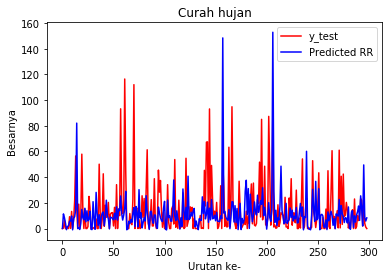

In [67]:
# Visualising the results
plt.plot(real_data[:,19], color = 'red', label = 'y_test')
plt.plot(percobaan2, color = 'blue', label = 'Predicted RR')
plt.title('Curah hujan')
plt.xlabel('Urutan ke-')
plt.ylabel('Besarnya')
plt.legend()
plt.show()

In [68]:
mse2 = mean_squared_error(real_data[:,19],percobaan2)
mse2

427.5442581417516

PERCOBAAN 3

In [69]:
pelatihan3 = regressor.fit(X_train, y_train, validation_split = 0.10, epochs = 200, batch_size = 32)

Train on 2420 samples, validate on 269 samples
Epoch 1/200
2420/2420 [==============================] - 2s 694us/step - loss: 0.0062 - acc: 0.2368 - val_loss: 0.0083 - val_acc: 0.2491
Epoch 2/200
2420/2420 [==============================] - 2s 691us/step - loss: 0.0063 - acc: 0.2368 - val_loss: 0.0081 - val_acc: 0.2491
Epoch 3/200
2420/2420 [==============================] - 2s 660us/step - loss: 0.0064 - acc: 0.2368 - val_loss: 0.0087 - val_acc: 0.2491
Epoch 4/200
2420/2420 [==============================] - 2s 659us/step - loss: 0.0061 - acc: 0.2368 - val_loss: 0.0076 - val_acc: 0.2491
Epoch 5/200
2420/2420 [==============================] - 2s 659us/step - loss: 0.0065 - acc: 0.2368 - val_loss: 0.0078 - val_acc: 0.2491
Epoch 6/200
2420/2420 [==============================] - 2s 669us/step - loss: 0.0064 - acc: 0.2368 - val_loss: 0.0078 - val_acc: 0.2491
Epoch 7/200
2420/2420 [==============================] - 2s 661us/step - loss: 0.0062 - acc: 0.2368 - val_loss: 0.0080 - val_acc: 0

Epoch 60/200
2420/2420 [==============================] - 2s 682us/step - loss: 0.0061 - acc: 0.2368 - val_loss: 0.0084 - val_acc: 0.2491
Epoch 61/200
2420/2420 [==============================] - 2s 686us/step - loss: 0.0061 - acc: 0.2368 - val_loss: 0.0081 - val_acc: 0.2491
Epoch 62/200
2420/2420 [==============================] - 2s 667us/step - loss: 0.0061 - acc: 0.2368 - val_loss: 0.0080 - val_acc: 0.2491
Epoch 63/200
2420/2420 [==============================] - 2s 669us/step - loss: 0.0061 - acc: 0.2368 - val_loss: 0.0090 - val_acc: 0.2491
Epoch 64/200
2420/2420 [==============================] - 2s 686us/step - loss: 0.0061 - acc: 0.2368 - val_loss: 0.0081 - val_acc: 0.2491
Epoch 65/200
2420/2420 [==============================] - 2s 679us/step - loss: 0.0062 - acc: 0.2364 - val_loss: 0.0079 - val_acc: 0.2491
Epoch 66/200
2420/2420 [==============================] - 2s 647us/step - loss: 0.0061 - acc: 0.2368 - val_loss: 0.0098 - val_acc: 0.2491
Epoch 67/200
2420/2420 [==========

Epoch 119/200
2420/2420 [==============================] - 2s 669us/step - loss: 0.0062 - acc: 0.2368 - val_loss: 0.0099 - val_acc: 0.2491
Epoch 120/200
2420/2420 [==============================] - 2s 690us/step - loss: 0.0057 - acc: 0.2368 - val_loss: 0.0101 - val_acc: 0.2491
Epoch 121/200
2420/2420 [==============================] - 2s 682us/step - loss: 0.0057 - acc: 0.2368 - val_loss: 0.0087 - val_acc: 0.2491
Epoch 122/200
2420/2420 [==============================] - 2s 667us/step - loss: 0.0058 - acc: 0.2368 - val_loss: 0.0094 - val_acc: 0.2491
Epoch 123/200
2420/2420 [==============================] - 2s 688us/step - loss: 0.0056 - acc: 0.2368 - val_loss: 0.0088 - val_acc: 0.2491
Epoch 124/200
2420/2420 [==============================] - 2s 686us/step - loss: 0.0058 - acc: 0.2368 - val_loss: 0.0083 - val_acc: 0.2491
Epoch 125/200
2420/2420 [==============================] - 2s 675us/step - loss: 0.0058 - acc: 0.2368 - val_loss: 0.0085 - val_acc: 0.2491
Epoch 126/200
2420/2420 [==

2420/2420 [==============================] - 2s 653us/step - loss: 0.0054 - acc: 0.2368 - val_loss: 0.0088 - val_acc: 0.2491
Epoch 178/200
2420/2420 [==============================] - 2s 659us/step - loss: 0.0056 - acc: 0.2368 - val_loss: 0.0081 - val_acc: 0.2491
Epoch 179/200
2420/2420 [==============================] - 2s 645us/step - loss: 0.0056 - acc: 0.2368 - val_loss: 0.0098 - val_acc: 0.2491
Epoch 180/200
2420/2420 [==============================] - 2s 650us/step - loss: 0.0055 - acc: 0.2368 - val_loss: 0.0097 - val_acc: 0.2491
Epoch 181/200
2420/2420 [==============================] - 2s 659us/step - loss: 0.0057 - acc: 0.2368 - val_loss: 0.0097 - val_acc: 0.2491
Epoch 182/200
2420/2420 [==============================] - 2s 658us/step - loss: 0.0056 - acc: 0.2368 - val_loss: 0.0100 - val_acc: 0.2491
Epoch 183/200
2420/2420 [==============================] - 2s 653us/step - loss: 0.0055 - acc: 0.2368 - val_loss: 0.0095 - val_acc: 0.2491
Epoch 184/200
2420/2420 [================

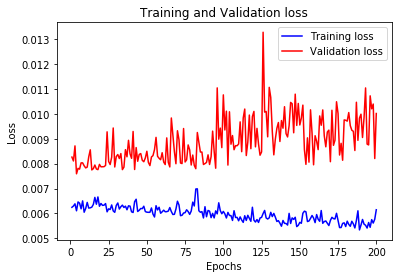

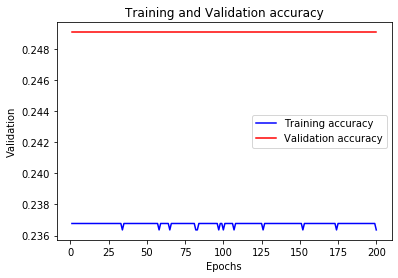

In [70]:
plot_history(pelatihan3)

In [71]:
loss_mean3 = stats.mean(pelatihan3.history['loss'])
loss_mean3

0.005974531335837481

In [72]:
acc_mean3 = stats.mean(pelatihan3.history['acc'])
acc_mean3

0.23675206613830052

In [73]:
valloss_mean3 = stats.mean(pelatihan3.history['val_loss'])
valloss_mean3

0.008887318653802363

In [74]:
val_acc_mean3 = stats.mean(pelatihan3.history['val_acc'])
val_acc_mean3

0.24907063252420675

In [75]:
predicted_RR3 = regressor.predict(X_test)

In [76]:
predicted_RR3.shape

(299, 1)

In [77]:
predicted_RReal3 = np.hstack((X_testReal,predicted_RR3))

In [78]:
predicted_RReal_c = sc.inverse_transform(predicted_RReal3)

In [79]:
percobaan3 = predicted_RReal_c[:,19] 

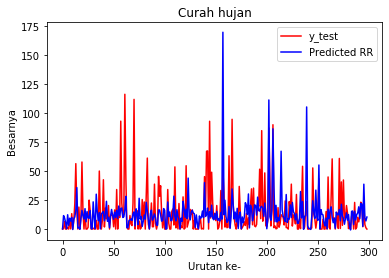

In [80]:
# Visualising the results
plt.plot(real_data[:,19], color = 'red', label = 'y_test')
plt.plot(percobaan3, color = 'blue', label = 'Predicted RR')
plt.title('Curah hujan')
plt.xlabel('Urutan ke-')
plt.ylabel('Besarnya')
plt.legend()
plt.show()

In [81]:
mse3 = mean_squared_error(real_data[:,19],percobaan3)
mse3

414.64743886348134

PERCOBAAN 4

In [82]:
pelatihan4 = regressor.fit(X_train, y_train, validation_split = 0.10, epochs = 200, batch_size = 32)

Train on 2420 samples, validate on 269 samples
Epoch 1/200
2420/2420 [==============================] - 2s 708us/step - loss: 0.0056 - acc: 0.2368 - val_loss: 0.0101 - val_acc: 0.2491
Epoch 2/200
2420/2420 [==============================] - 2s 686us/step - loss: 0.0054 - acc: 0.2368 - val_loss: 0.0106 - val_acc: 0.2491
Epoch 3/200
2420/2420 [==============================] - 2s 678us/step - loss: 0.0053 - acc: 0.2368 - val_loss: 0.0090 - val_acc: 0.2491
Epoch 4/200
2420/2420 [==============================] - 2s 695us/step - loss: 0.0055 - acc: 0.2368 - val_loss: 0.0094 - val_acc: 0.2491
Epoch 5/200
2420/2420 [==============================] - 2s 702us/step - loss: 0.0054 - acc: 0.2368 - val_loss: 0.0100 - val_acc: 0.2491
Epoch 6/200
2420/2420 [==============================] - 2s 696us/step - loss: 0.0054 - acc: 0.2368 - val_loss: 0.0096 - val_acc: 0.2491
Epoch 7/200
2420/2420 [==============================] - 2s 673us/step - loss: 0.0056 - acc: 0.2368 - val_loss: 0.0088 - val_acc: 0

2420/2420 [==============================] - 2s 663us/step - loss: 0.0051 - acc: 0.2368 - val_loss: 0.0106 - val_acc: 0.2491
Epoch 61/200
2420/2420 [==============================] - 2s 670us/step - loss: 0.0051 - acc: 0.2364 - val_loss: 0.0078 - val_acc: 0.2491
Epoch 62/200
2420/2420 [==============================] - 2s 665us/step - loss: 0.0055 - acc: 0.2368 - val_loss: 0.0098 - val_acc: 0.2491
Epoch 63/200
2420/2420 [==============================] - 2s 669us/step - loss: 0.0053 - acc: 0.2368 - val_loss: 0.0091 - val_acc: 0.2491
Epoch 64/200
2420/2420 [==============================] - 2s 666us/step - loss: 0.0056 - acc: 0.2368 - val_loss: 0.0088 - val_acc: 0.2491
Epoch 65/200
2420/2420 [==============================] - 2s 696us/step - loss: 0.0061 - acc: 0.2368 - val_loss: 0.0089 - val_acc: 0.2491
Epoch 66/200
2420/2420 [==============================] - 2s 695us/step - loss: 0.0051 - acc: 0.2368 - val_loss: 0.0094 - val_acc: 0.2491
Epoch 67/200
2420/2420 [=======================

2420/2420 [==============================] - 2s 663us/step - loss: 0.0048 - acc: 0.2368 - val_loss: 0.0115 - val_acc: 0.2491
Epoch 120/200
2420/2420 [==============================] - 2s 656us/step - loss: 0.0050 - acc: 0.2368 - val_loss: 0.0097 - val_acc: 0.2491
Epoch 121/200
2420/2420 [==============================] - 2s 673us/step - loss: 0.0049 - acc: 0.2368 - val_loss: 0.0102 - val_acc: 0.2491
Epoch 122/200
2420/2420 [==============================] - 2s 681us/step - loss: 0.0048 - acc: 0.2368 - val_loss: 0.0101 - val_acc: 0.2491
Epoch 123/200
2420/2420 [==============================] - 2s 683us/step - loss: 0.0055 - acc: 0.2364 - val_loss: 0.0099 - val_acc: 0.2491
Epoch 124/200
2420/2420 [==============================] - 2s 676us/step - loss: 0.0052 - acc: 0.2368 - val_loss: 0.0097 - val_acc: 0.2491
Epoch 125/200
2420/2420 [==============================] - 2s 662us/step - loss: 0.0050 - acc: 0.2368 - val_loss: 0.0092 - val_acc: 0.2491
Epoch 126/200
2420/2420 [================

2420/2420 [==============================] - 2s 673us/step - loss: 0.0048 - acc: 0.2368 - val_loss: 0.0094 - val_acc: 0.2491
Epoch 179/200
2420/2420 [==============================] - 2s 650us/step - loss: 0.0048 - acc: 0.2368 - val_loss: 0.0104 - val_acc: 0.2491
Epoch 180/200
2420/2420 [==============================] - 2s 663us/step - loss: 0.0046 - acc: 0.2368 - val_loss: 0.0104 - val_acc: 0.2491
Epoch 181/200
2420/2420 [==============================] - 2s 684us/step - loss: 0.0046 - acc: 0.2368 - val_loss: 0.0092 - val_acc: 0.2491
Epoch 182/200
2420/2420 [==============================] - 2s 660us/step - loss: 0.0048 - acc: 0.2368 - val_loss: 0.0082 - val_acc: 0.2491
Epoch 183/200
2420/2420 [==============================] - 2s 689us/step - loss: 0.0050 - acc: 0.2368 - val_loss: 0.0093 - val_acc: 0.2491
Epoch 184/200
2420/2420 [==============================] - 2s 683us/step - loss: 0.0046 - acc: 0.2368 - val_loss: 0.0094 - val_acc: 0.2491
Epoch 185/200
2420/2420 [================

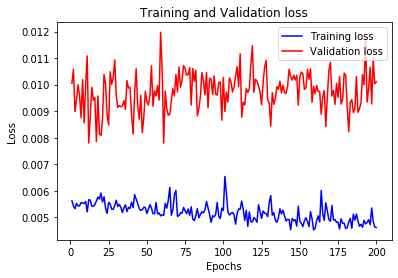

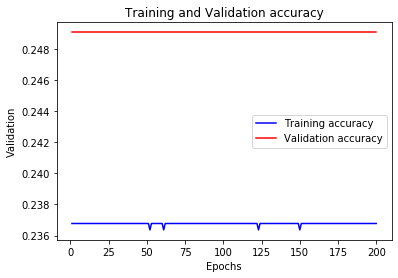

In [83]:
plot_history(pelatihan4)

In [84]:
loss_mean4 = stats.mean(pelatihan4.history['loss'])
loss_mean4

0.005180388124752982

In [85]:
acc_mean4 = stats.mean(pelatihan4.history['acc'])
acc_mean4

0.2367685950628736

In [86]:
valloss_mean4 = stats.mean(pelatihan4.history['val_loss'])
valloss_mean4

0.009742955906298461

In [87]:
val_acc_mean4 = stats.mean(pelatihan4.history['val_acc'])
val_acc_mean4

0.24907063252420675

In [88]:
predicted_RR4 = regressor.predict(X_test)

In [89]:
predicted_RR4.shape

(299, 1)

In [90]:
predicted_RReal4 = np.hstack((X_testReal,predicted_RR4))

In [91]:
predicted_RReal_d = sc.inverse_transform(predicted_RReal4)

In [92]:
percobaan4 = predicted_RReal_d[:,19] 

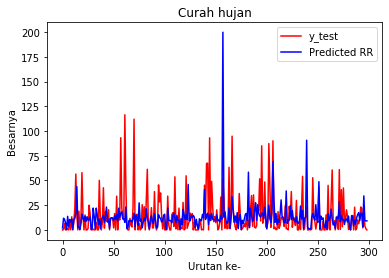

In [93]:
# Visualising the results
plt.plot(real_data[:,19], color = 'red', label = 'y_test')
plt.plot(percobaan4, color = 'blue', label = 'Predicted RR')
plt.title('Curah hujan')
plt.xlabel('Urutan ke-')
plt.ylabel('Besarnya')
plt.legend()
plt.show()

In [94]:
mse4 = mean_squared_error(real_data[:,19],percobaan4)
mse4

446.6844195282116

PERCOBAAN 5

In [95]:
pelatihan5 = regressor.fit(X_train, y_train, validation_split = 0.10, epochs = 200, batch_size = 32)

Train on 2420 samples, validate on 269 samples
Epoch 1/200
2420/2420 [==============================] - 2s 672us/step - loss: 0.0049 - acc: 0.2368 - val_loss: 0.0102 - val_acc: 0.2491
Epoch 2/200
2420/2420 [==============================] - 2s 655us/step - loss: 0.0047 - acc: 0.2368 - val_loss: 0.0099 - val_acc: 0.2491
Epoch 3/200
2420/2420 [==============================] - 2s 650us/step - loss: 0.0050 - acc: 0.2368 - val_loss: 0.0099 - val_acc: 0.2491
Epoch 4/200
2420/2420 [==============================] - 2s 670us/step - loss: 0.0052 - acc: 0.2368 - val_loss: 0.0095 - val_acc: 0.2491
Epoch 5/200
2420/2420 [==============================] - 2s 662us/step - loss: 0.0049 - acc: 0.2368 - val_loss: 0.0101 - val_acc: 0.2491
Epoch 6/200
2420/2420 [==============================] - 2s 659us/step - loss: 0.0048 - acc: 0.2368 - val_loss: 0.0094 - val_acc: 0.2491
Epoch 7/200
2420/2420 [==============================] - 2s 651us/step - loss: 0.0045 - acc: 0.2368 - val_loss: 0.0098 - val_acc: 0

Epoch 60/200
2420/2420 [==============================] - 2s 681us/step - loss: 0.0048 - acc: 0.2368 - val_loss: 0.0089 - val_acc: 0.2491
Epoch 61/200
2420/2420 [==============================] - 2s 685us/step - loss: 0.0045 - acc: 0.2368 - val_loss: 0.0102 - val_acc: 0.2491
Epoch 62/200
2420/2420 [==============================] - 2s 673us/step - loss: 0.0049 - acc: 0.2368 - val_loss: 0.0085 - val_acc: 0.2491
Epoch 63/200
2420/2420 [==============================] - 2s 669us/step - loss: 0.0047 - acc: 0.2368 - val_loss: 0.0098 - val_acc: 0.2491
Epoch 64/200
2420/2420 [==============================] - 2s 668us/step - loss: 0.0044 - acc: 0.2368 - val_loss: 0.0105 - val_acc: 0.2491
Epoch 65/200
2420/2420 [==============================] - 2s 654us/step - loss: 0.0045 - acc: 0.2368 - val_loss: 0.0104 - val_acc: 0.2491
Epoch 66/200
2420/2420 [==============================] - 2s 661us/step - loss: 0.0045 - acc: 0.2368 - val_loss: 0.0098 - val_acc: 0.2491
Epoch 67/200
2420/2420 [==========

2420/2420 [==============================] - 2s 683us/step - loss: 0.0044 - acc: 0.2368 - val_loss: 0.0095 - val_acc: 0.2491
Epoch 120/200
2420/2420 [==============================] - 2s 673us/step - loss: 0.0044 - acc: 0.2368 - val_loss: 0.0101 - val_acc: 0.2491
Epoch 121/200
2420/2420 [==============================] - 2s 662us/step - loss: 0.0042 - acc: 0.2368 - val_loss: 0.0095 - val_acc: 0.2491
Epoch 122/200
2420/2420 [==============================] - 2s 656us/step - loss: 0.0042 - acc: 0.2368 - val_loss: 0.0105 - val_acc: 0.2491
Epoch 123/200
2420/2420 [==============================] - 2s 659us/step - loss: 0.0044 - acc: 0.2368 - val_loss: 0.0099 - val_acc: 0.2491
Epoch 124/200
2420/2420 [==============================] - 2s 655us/step - loss: 0.0043 - acc: 0.2368 - val_loss: 0.0109 - val_acc: 0.2491
Epoch 125/200
2420/2420 [==============================] - ETA: 0s - loss: 0.0055 - acc: 0.236 - 2s 655us/step - loss: 0.0054 - acc: 0.2368 - val_loss: 0.0096 - val_acc: 0.2491
Epo

2420/2420 [==============================] - 2s 656us/step - loss: 0.0040 - acc: 0.2368 - val_loss: 0.0102 - val_acc: 0.2491
Epoch 178/200
2420/2420 [==============================] - 2s 672us/step - loss: 0.0042 - acc: 0.2368 - val_loss: 0.0100 - val_acc: 0.2491
Epoch 179/200
2420/2420 [==============================] - 2s 673us/step - loss: 0.0044 - acc: 0.2368 - val_loss: 0.0099 - val_acc: 0.2491
Epoch 180/200
2420/2420 [==============================] - 2s 650us/step - loss: 0.0042 - acc: 0.2368 - val_loss: 0.0108 - val_acc: 0.2491
Epoch 181/200
2420/2420 [==============================] - 2s 661us/step - loss: 0.0038 - acc: 0.2368 - val_loss: 0.0101 - val_acc: 0.2491
Epoch 182/200
2420/2420 [==============================] - 2s 709us/step - loss: 0.0040 - acc: 0.2368 - val_loss: 0.0108 - val_acc: 0.2491
Epoch 183/200
2420/2420 [==============================] - 2s 680us/step - loss: 0.0042 - acc: 0.2368 - val_loss: 0.0107 - val_acc: 0.2491
Epoch 184/200
2420/2420 [================

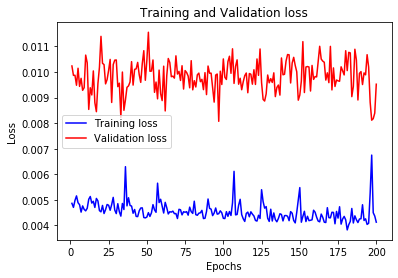

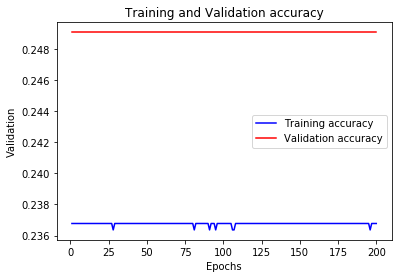

In [96]:
plot_history(pelatihan5)

In [97]:
loss_mean5 = stats.mean(pelatihan5.history['loss'])
loss_mean5

0.004543027378710118

In [98]:
acc_mean5 = stats.mean(pelatihan5.history['acc'])
acc_mean5

0.23676239671567378

In [99]:
valloss_mean5 = stats.mean(pelatihan5.history['val_loss'])
valloss_mean5

0.009821096828162365

In [100]:
val_acc_mean5 = stats.mean(pelatihan5.history['val_acc'])
val_acc_mean5

0.24907063252420675

In [101]:
predicted_RR5 = regressor.predict(X_test)

In [102]:
predicted_RR5.shape

(299, 1)

In [103]:
predicted_RReal5 = np.hstack((X_testReal,predicted_RR5))

In [104]:
predicted_RReal_e = sc.inverse_transform(predicted_RReal5)

In [105]:
percobaan5 = predicted_RReal_e[:,19] 

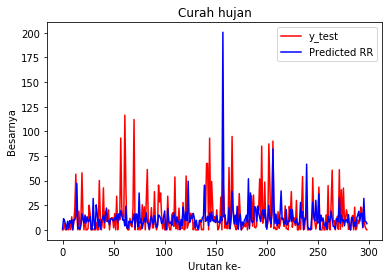

In [106]:
# Visualising the results
plt.plot(real_data[:,19], color = 'red', label = 'y_test')
plt.plot(percobaan5, color = 'blue', label = 'Predicted RR')
plt.title('Curah hujan')
plt.xlabel('Urutan ke-')
plt.ylabel('Besarnya')
plt.legend()
plt.show()

In [107]:
mse5 = mean_squared_error(real_data[:,19],percobaan5)
mse5

442.52555950851905

In [108]:
meanRR1 = stats.mean(percobaan1)
meanRR1

13.932268321576425

In [109]:
meanRR2 = stats.mean(percobaan2)
meanRR2

11.687272925210188

In [110]:
meanRR3 = stats.mean(percobaan3)
meanRR3

13.608762526105977

In [111]:
meanRR4 = stats.mean(percobaan4)
meanRR4

12.965783682505423

In [112]:
meanRR5 = stats.mean(percobaan5)
meanRR5

12.209024946675651

# PENGATURAN PARAMETER

In [113]:
pelatihan6 = regressor.fit(X_train, y_train, validation_split = 0.10, epochs = 400, batch_size = 64)

Train on 2420 samples, validate on 269 samples
Epoch 1/400
2420/2420 [==============================] - 1s 339us/step - loss: 0.0042 - acc: 0.2368 - val_loss: 0.0100 - val_acc: 0.2491
Epoch 2/400
2420/2420 [==============================] - 1s 328us/step - loss: 0.0039 - acc: 0.2368 - val_loss: 0.0095 - val_acc: 0.2491
Epoch 3/400
2420/2420 [==============================] - 1s 331us/step - loss: 0.0039 - acc: 0.2368 - val_loss: 0.0091 - val_acc: 0.2491
Epoch 4/400
2420/2420 [==============================] - 1s 329us/step - loss: 0.0041 - acc: 0.2368 - val_loss: 0.0099 - val_acc: 0.2491
Epoch 5/400
2420/2420 [==============================] - 1s 331us/step - loss: 0.0040 - acc: 0.2368 - val_loss: 0.0099 - val_acc: 0.2491
Epoch 6/400
2420/2420 [==============================] - 1s 327us/step - loss: 0.0040 - acc: 0.2368 - val_loss: 0.0100 - val_acc: 0.2491
Epoch 7/400
2420/2420 [==============================] - 1s 344us/step - loss: 0.0041 - acc: 0.2368 - val_loss: 0.0101 - val_acc: 0

Epoch 60/400
2420/2420 [==============================] - 1s 342us/step - loss: 0.0039 - acc: 0.2368 - val_loss: 0.0096 - val_acc: 0.2491
Epoch 61/400
2420/2420 [==============================] - 1s 331us/step - loss: 0.0038 - acc: 0.2368 - val_loss: 0.0103 - val_acc: 0.2491
Epoch 62/400
2420/2420 [==============================] - 1s 338us/step - loss: 0.0038 - acc: 0.2368 - val_loss: 0.0087 - val_acc: 0.2491
Epoch 63/400
2420/2420 [==============================] - 1s 333us/step - loss: 0.0040 - acc: 0.2368 - val_loss: 0.0094 - val_acc: 0.2491
Epoch 64/400
2420/2420 [==============================] - 1s 331us/step - loss: 0.0040 - acc: 0.2368 - val_loss: 0.0092 - val_acc: 0.2491
Epoch 65/400
2420/2420 [==============================] - 1s 356us/step - loss: 0.0039 - acc: 0.2368 - val_loss: 0.0100 - val_acc: 0.2491
Epoch 66/400
2420/2420 [==============================] - 1s 345us/step - loss: 0.0045 - acc: 0.2368 - val_loss: 0.0098 - val_acc: 0.2491
Epoch 67/400
2420/2420 [==========

2420/2420 [==============================] - 1s 349us/step - loss: 0.0038 - acc: 0.2368 - val_loss: 0.0115 - val_acc: 0.2491
Epoch 120/400
2420/2420 [==============================] - 1s 341us/step - loss: 0.0038 - acc: 0.2368 - val_loss: 0.0110 - val_acc: 0.2491
Epoch 121/400
2420/2420 [==============================] - 1s 340us/step - loss: 0.0039 - acc: 0.2368 - val_loss: 0.0101 - val_acc: 0.2491
Epoch 122/400
2420/2420 [==============================] - 1s 338us/step - loss: 0.0038 - acc: 0.2368 - val_loss: 0.0095 - val_acc: 0.2491
Epoch 123/400
2420/2420 [==============================] - 1s 332us/step - loss: 0.0041 - acc: 0.2368 - val_loss: 0.0102 - val_acc: 0.2491
Epoch 124/400
2420/2420 [==============================] - 1s 345us/step - loss: 0.0038 - acc: 0.2368 - val_loss: 0.0105 - val_acc: 0.2491
Epoch 125/400
2420/2420 [==============================] - 1s 352us/step - loss: 0.0040 - acc: 0.2368 - val_loss: 0.0096 - val_acc: 0.2491
Epoch 126/400
2420/2420 [================

2420/2420 [==============================] - 1s 333us/step - loss: 0.0037 - acc: 0.2368 - val_loss: 0.0110 - val_acc: 0.2491
Epoch 179/400
2420/2420 [==============================] - 1s 337us/step - loss: 0.0037 - acc: 0.2368 - val_loss: 0.0104 - val_acc: 0.2491
Epoch 180/400
2420/2420 [==============================] - 1s 337us/step - loss: 0.0039 - acc: 0.2368 - val_loss: 0.0099 - val_acc: 0.2491
Epoch 181/400
2420/2420 [==============================] - 1s 324us/step - loss: 0.0038 - acc: 0.2368 - val_loss: 0.0106 - val_acc: 0.2491
Epoch 182/400
2420/2420 [==============================] - 1s 331us/step - loss: 0.0038 - acc: 0.2368 - val_loss: 0.0099 - val_acc: 0.2491
Epoch 183/400
2420/2420 [==============================] - 1s 336us/step - loss: 0.0041 - acc: 0.2368 - val_loss: 0.0099 - val_acc: 0.2491
Epoch 184/400
2420/2420 [==============================] - 1s 330us/step - loss: 0.0037 - acc: 0.2368 - val_loss: 0.0105 - val_acc: 0.2491
Epoch 185/400
2420/2420 [================

2420/2420 [==============================] - 1s 331us/step - loss: 0.0036 - acc: 0.2368 - val_loss: 0.0112 - val_acc: 0.2491
Epoch 238/400
2420/2420 [==============================] - 1s 335us/step - loss: 0.0037 - acc: 0.2368 - val_loss: 0.0107 - val_acc: 0.2491
Epoch 239/400
2420/2420 [==============================] - 1s 327us/step - loss: 0.0039 - acc: 0.2368 - val_loss: 0.0106 - val_acc: 0.2491
Epoch 240/400
2420/2420 [==============================] - 1s 328us/step - loss: 0.0037 - acc: 0.2368 - val_loss: 0.0105 - val_acc: 0.2491
Epoch 241/400
2420/2420 [==============================] - 1s 329us/step - loss: 0.0037 - acc: 0.2368 - val_loss: 0.0107 - val_acc: 0.2491
Epoch 242/400
2420/2420 [==============================] - 1s 327us/step - loss: 0.0040 - acc: 0.2368 - val_loss: 0.0111 - val_acc: 0.2491
Epoch 243/400
2420/2420 [==============================] - 1s 331us/step - loss: 0.0036 - acc: 0.2368 - val_loss: 0.0105 - val_acc: 0.2491
Epoch 244/400
2420/2420 [================

2420/2420 [==============================] - 1s 329us/step - loss: 0.0035 - acc: 0.2368 - val_loss: 0.0108 - val_acc: 0.2491
Epoch 296/400
2420/2420 [==============================] - 1s 325us/step - loss: 0.0036 - acc: 0.2368 - val_loss: 0.0104 - val_acc: 0.2491
Epoch 297/400
2420/2420 [==============================] - 1s 323us/step - loss: 0.0035 - acc: 0.2368 - val_loss: 0.0105 - val_acc: 0.2491
Epoch 298/400
2420/2420 [==============================] - 1s 326us/step - loss: 0.0036 - acc: 0.2368 - val_loss: 0.0114 - val_acc: 0.2491
Epoch 299/400
2420/2420 [==============================] - 1s 327us/step - loss: 0.0037 - acc: 0.2368 - val_loss: 0.0088 - val_acc: 0.2491
Epoch 300/400
2420/2420 [==============================] - 1s 327us/step - loss: 0.0038 - acc: 0.2368 - val_loss: 0.0100 - val_acc: 0.2491
Epoch 301/400
2420/2420 [==============================] - 1s 326us/step - loss: 0.0037 - acc: 0.2368 - val_loss: 0.0103 - val_acc: 0.2491
Epoch 302/400
2420/2420 [================

2420/2420 [==============================] - 1s 341us/step - loss: 0.0035 - acc: 0.2368 - val_loss: 0.0104 - val_acc: 0.2491
Epoch 355/400
2420/2420 [==============================] - 1s 329us/step - loss: 0.0036 - acc: 0.2368 - val_loss: 0.0100 - val_acc: 0.2491
Epoch 356/400
2420/2420 [==============================] - 1s 343us/step - loss: 0.0034 - acc: 0.2368 - val_loss: 0.0100 - val_acc: 0.2491
Epoch 357/400
2420/2420 [==============================] - 1s 330us/step - loss: 0.0033 - acc: 0.2368 - val_loss: 0.0097 - val_acc: 0.2491
Epoch 358/400
2420/2420 [==============================] - 1s 356us/step - loss: 0.0035 - acc: 0.2368 - val_loss: 0.0099 - val_acc: 0.2491
Epoch 359/400
2420/2420 [==============================] - 1s 338us/step - loss: 0.0037 - acc: 0.2368 - val_loss: 0.0099 - val_acc: 0.2491
Epoch 360/400
2420/2420 [==============================] - 1s 351us/step - loss: 0.0035 - acc: 0.2368 - val_loss: 0.0099 - val_acc: 0.2491
Epoch 361/400
2420/2420 [================

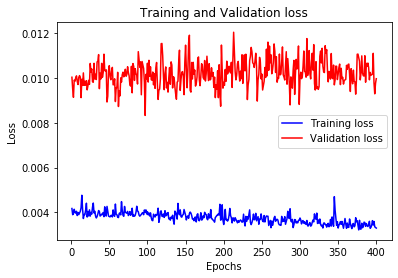

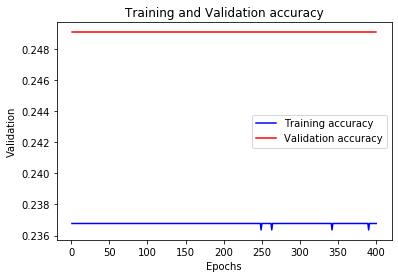

In [114]:
plot_history(pelatihan6)

In [115]:
loss_mean6 = stats.mean(pelatihan6.history['loss'])
loss_mean6

0.003756352763515243

In [116]:
acc_mean6 = stats.mean(pelatihan6.history['acc'])
acc_mean6

0.23677272734466231

In [117]:
valloss_mean6 = stats.mean(pelatihan6.history['val_loss'])
valloss_mean6

0.01020693019336067

In [118]:
val_acc_mean6 = stats.mean(pelatihan6.history['val_acc'])
val_acc_mean6

0.24907063252420675

In [119]:
predicted_RR6 = regressor.predict(X_test)

In [120]:
predicted_RR6.shape

(299, 1)

In [121]:
predicted_RReal6 = np.hstack((X_testReal,predicted_RR6))

In [122]:
predicted_RReal_f = sc.inverse_transform(predicted_RReal6)

In [123]:
percobaan6 = predicted_RReal_f[:,19] 

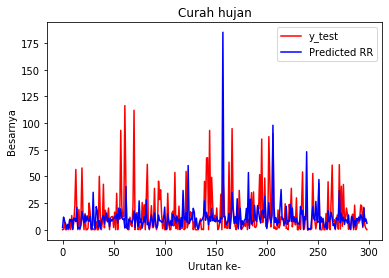

In [124]:
# Visualising the results
plt.plot(real_data[:,19], color = 'red', label = 'y_test')
plt.plot(percobaan6, color = 'blue', label = 'Predicted RR')
plt.title('Curah hujan')
plt.xlabel('Urutan ke-')
plt.ylabel('Besarnya')
plt.legend()
plt.show()

In [125]:
mse6 = mean_squared_error(real_data[:,19],percobaan6)
mse6

434.7370515061536

In [126]:
pd.DataFrame(percobaan1).to_csv("percobaan1.csv",header=None,index ='RR')
pd.DataFrame(percobaan2).to_csv("percobaan2.csv",header=None)
pd.DataFrame(percobaan3).to_csv("percobaan3.csv",header=None)
pd.DataFrame(percobaan4).to_csv("percobaan4.csv",header=None)
pd.DataFrame(percobaan5).to_csv("percobaan5.csv",header=None)
pd.DataFrame(percobaan6).to_csv("percobaan6.csv",header=None)

# TEST PREDIKSI MODEL

In [127]:
test_prototype = pd.read_csv('CSV\Data Test Prediksi Prototype 3a .csv')
test_prototype.head()

,Tanggal,Tn,Tx,Tavg,RH_avg,ff_x,ddd_x,ff_avg,ddd_car,bulan,RH_avg_5day,RH1,RH2,RH3,ff_x1,ff_x2,ff_x3,RR_avg5_day,RR1,RR2,RR3,RR
0,01-01-2019,25.000000,32.3,27.8,77.0,6.0,240.0,2.0,9,1,79.8,79.0,78.0,78.0,5.0,6.0,12.0,11.806,0.500,20.665,20.665,4.0
1,02-01-2019,25.036364,31.6,28.1,78.0,5.0,240.0,2.0,7,1,78.8,78.0,78.0,77.0,6.0,12.0,6.0,10.246,20.665,20.665,4.000,0.4
2,03-01-2019,24.600000,30.4,26.9,86.0,8.0,230.0,2.0,6,1,78.0,78.0,77.0,78.0,12.0,6.0,5.0,9.246,20.665,4.000,0.400,39.7
3,04-01-2019,25.036364,31.8,28.4,76.0,4.0,200.0,1.0,9,1,79.4,77.0,78.0,86.0,6.0,5.0,8.0,17.086,4.000,0.400,39.700,16.8
4,05-01-2019,25.000000,31.0,27.7,83.0,4.0,180.0,1.0,9,1,79.0,78.0,86.0,76.0,5.0,8.0,4.0,16.313,0.400,39.700,16.800,0.3


In [128]:
test_prototype.fillna(method='ffill',inplace=True)

In [129]:
test_prototype = test_prototype.drop(columns = ['ff_avg','Tanggal'])

In [130]:
prototype_scaled = sc.fit_transform(test_prototype)

In [131]:
X2 = np.delete(prototype_scaled,19,axis=1)
y2 = prototype_scaled[:,19]

In [132]:
X_proTest = np.reshape(X2,(X2.shape[0],1,X2.shape[1])) 

In [133]:
predicted_RRTest = regressor.predict(X_proTest)

In [134]:
predicted_RRTest.shape

(148, 1)

In [135]:
predicted_RRealTest = np.hstack((X2,predicted_RRTest))

In [136]:
predicted_RReal_Pred = sc.inverse_transform(predicted_RRealTest)

In [137]:
percobaanTest = predicted_RReal_Pred[:,19] 

In [138]:
pd.DataFrame(percobaanTest).to_csv("percobaanTest.csv",header=None,index ='RR')

In [139]:
stats.mean(percobaanTest)

7.276307910449198

In [140]:
pelatihan.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])